In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('HR.csv')

target = 'left'
class_names = ['stayed', 'left']
features = [c for c in data if c != target]
print(features)

X, y = data[features], data[target]

['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


In [3]:
print("Logistic Regression:", cross_val_score(LogisticRegression(), X, y).mean())

Logistic Regression: 0.628705314396


In [4]:
print("Decision tree:", cross_val_score(DecisionTreeClassifier(), X, y).mean())

Decision tree: 0.652776435287


# Почему линейная модель хуже дерева?

In [6]:
data[:1]

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.53,2,157,3,0,1,0


In [7]:
model = DecisionTreeClassifier()
model.fit(X, y)
pd.DataFrame({'features': features, 'importances': model.feature_importances_})

,features,importances
0,last_evaluation,0.320563
1,number_project,0.151889
2,average_montly_hours,0.359036
3,time_spend_company,0.133837
4,Work_accident,0.028379
5,promotion_last_5years,0.006296


In [8]:
def plot_decision_surface(model, X, y):
    
    """Function to plot the decision boundaries of a classification model.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """

    plt.figure(figsize=(8,6))
    plt.subplot(1, 1, 1)

    n_classes = 2
    plot_step = 0.02
    plot_colors = ['white', 'tab:blue']
    cmap = plt.cm.Blues
    
    model.fit(X, y)

    d0, d1 = (X[:, 0].max() - X[:, 0].min()) * 0.1, (X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - d0, X[:, 0].max() + d0
    y_min, y_max = X[:, 1].min() - d1, X[:, 1].max() + d1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    plt.xlabel(c1)
    plt.ylabel(c2)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], cmap=cmap, label=class_names[i],
                    edgecolor='black', s=90, color=color)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    return plt

In [9]:
c1, c2 = 'average_montly_hours', 'last_evaluation'

Decision tree: 0.653843288658


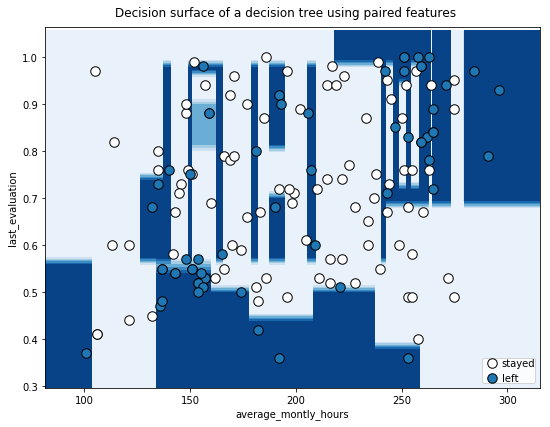

In [10]:
print("Decision tree:", cross_val_score(DecisionTreeClassifier(), X, y).mean())
plot_decision_surface(model = DecisionTreeClassifier(), X = data[[c1, c2]].values[::100], y = data[target][::100]);

Logistic Regression: 0.628705314396


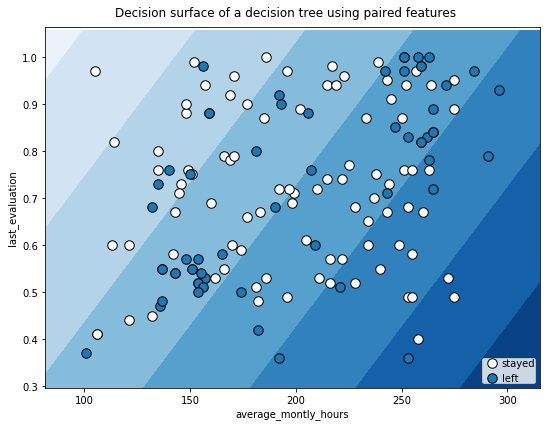

In [11]:
print("Logistic Regression:", cross_val_score(LogisticRegression(), X, y).mean())
plot_decision_surface(model = LogisticRegression(), X = data[[c1, c2]].values[::100], y = data[target][::100]);

RandomForestClassifier: 0.715981783023


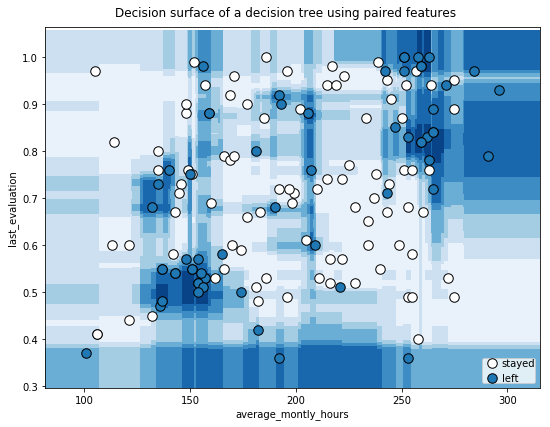

In [12]:
print("RandomForestClassifier:", cross_val_score(RandomForestClassifier(), X, y).mean())
plot_decision_surface(model = RandomForestClassifier(), X = data[[c1, c2]].values[::100], y = data[target][::100]);

In [13]:
model = DecisionTreeClassifier()
model.fit(X, y)
tree_importances = model.feature_importances_

model = LogisticRegression()
model.fit(X, y)
linear_model_coef = model.coef_[0]

pd.DataFrame({'features': features, 'tree_importances': tree_importances, 'linear_model_coef': linear_model_coef})

,features,linear_model_coef,tree_importances
0,last_evaluation,-0.233852,0.316966
1,number_project,-0.021650,0.152878
2,average_montly_hours,0.001867,0.363024
3,time_spend_company,0.117117,0.132854
4,Work_accident,-0.574278,0.027925
5,promotion_last_5years,-0.538320,0.006353


In [14]:
for c in data:
    print(c, ':', data[c].unique(), '\n')

last_evaluation : [ 0.53  0.86  0.88  0.87  0.52  0.5   0.77  0.85  1.    0.54  0.81  0.92
  0.55  0.56  0.47  0.99  0.51  0.89  0.83  0.95  0.57  0.49  0.46  0.62
  0.94  0.48  0.8   0.74  0.7   0.78  0.91  0.93  0.98  0.97  0.79  0.59
  0.84  0.45  0.96  0.68  0.82  0.9   0.71  0.6   0.65  0.58  0.72  0.67
  0.75  0.73  0.63  0.61  0.76  0.66  0.69  0.37  0.64  0.39  0.41  0.43
  0.44  0.36  0.38  0.4   0.42] 

number_project : [2 5 7 6 4 3] 

average_montly_hours : [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227